# Problem 1:

### Uploading necessary libraries

In [638]:
import numpy as np   
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   

import warnings
warnings.filterwarnings("ignore")

### Importing the data

In [639]:
df = pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [640]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


### EDA

In [641]:
# Shape of the data
print('No. of rows: {}'.format(df.shape[0]))
print('No. of colums: {}'.format(df.shape[1]))

No. of rows: 1525
No. of colums: 9


In [642]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


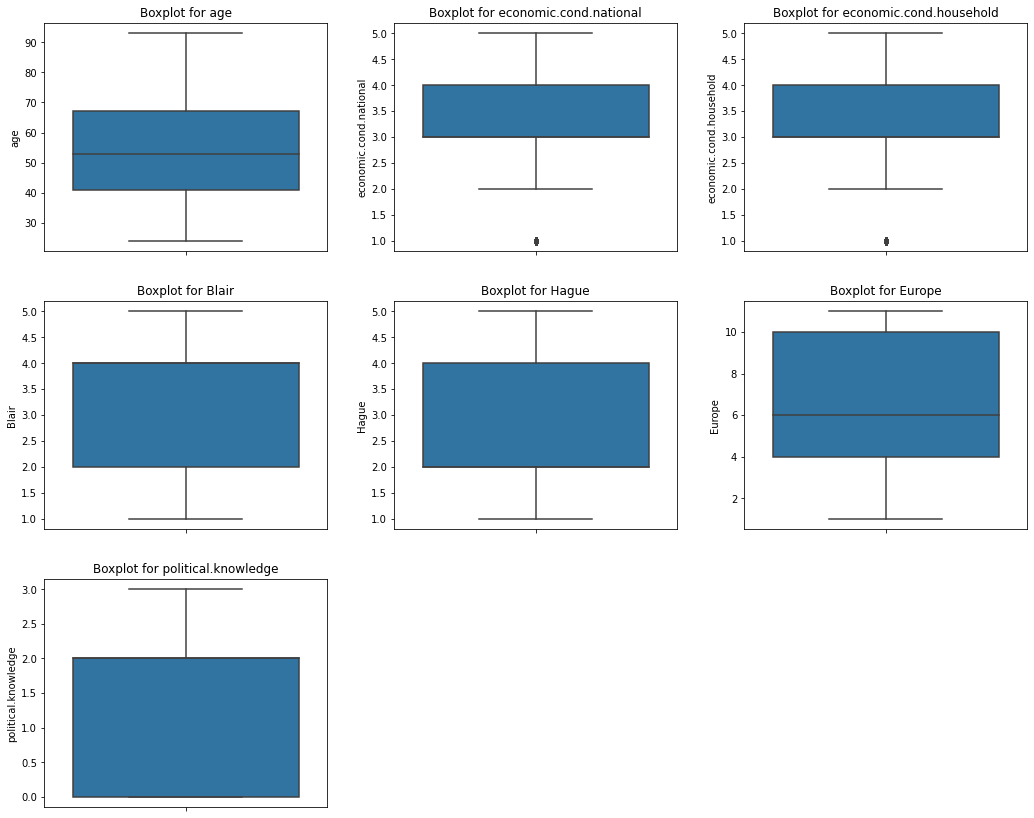

In [643]:
# Ploting the boxplots
plt.figure(figsize=(15,12))
cont=['age','economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']
for i in range(len(cont)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[cont[i]], data = df)
    plt.title('Boxplot for {}'.format(cont[i]))
    plt.tight_layout(pad=3)

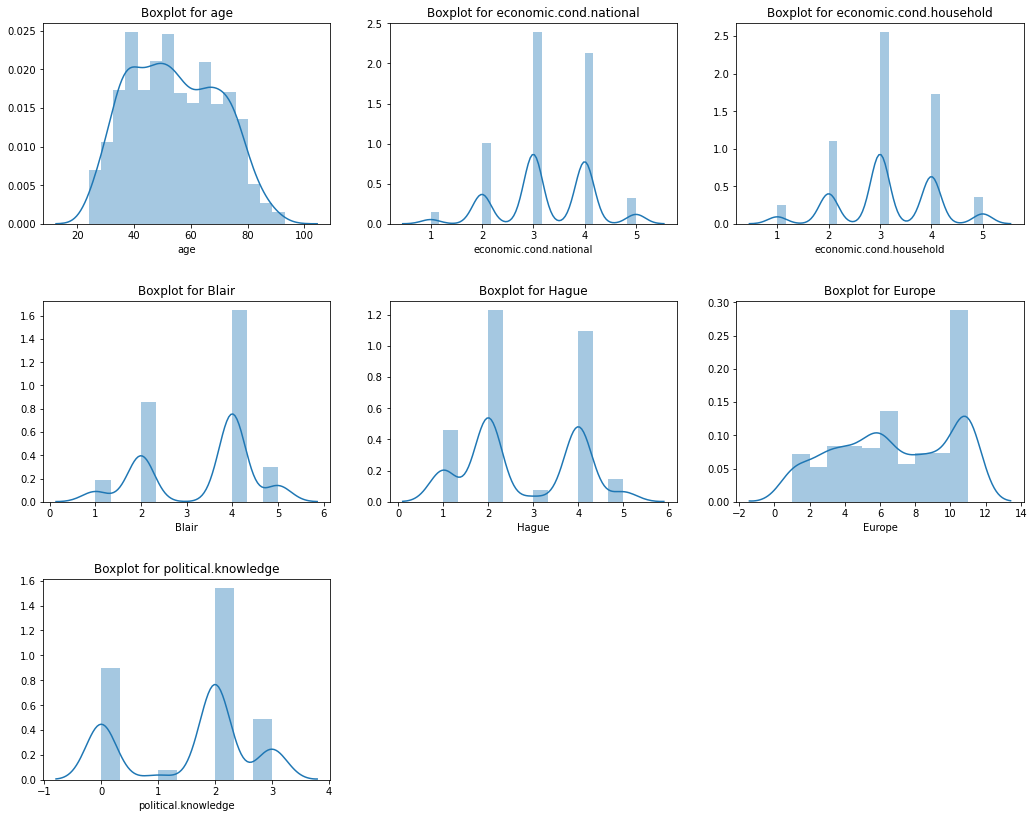

In [644]:
# Ploting the distributions
plt.figure(figsize=(15,12))
cont=['age','economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']
for i in range(len(cont)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[cont[i]])
    plt.title('Boxplot for {}'.format(cont[i]))
    plt.tight_layout(pad=3)

In [645]:
# Cheking the variables

for column in df.columns:
    print(column.upper(), ': ', df[column].nunique())
    print(df[column].value_counts().sort_values())

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64
AGE :  70
93     1
91     1
90     1
92     2
87     3
      ..
54    37
47    38
49    39
35    39
37    42
Name: age, Length: 70, dtype: int64
ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64
ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64
BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64
HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64
EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64
POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64
GENDER :  2
male      713
female    812
Name: gender, dtype: int64


In [646]:
# Descibe the variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [647]:
# Checking got null values
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [648]:
# Checking for the duplicate rows
dups = df.duplicated()
print('No. of duplicated rows: {}'.format(dups.sum()))

No. of duplicated rows: 8


In [649]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int8 
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 86.5 KB


### Univariate Analysis

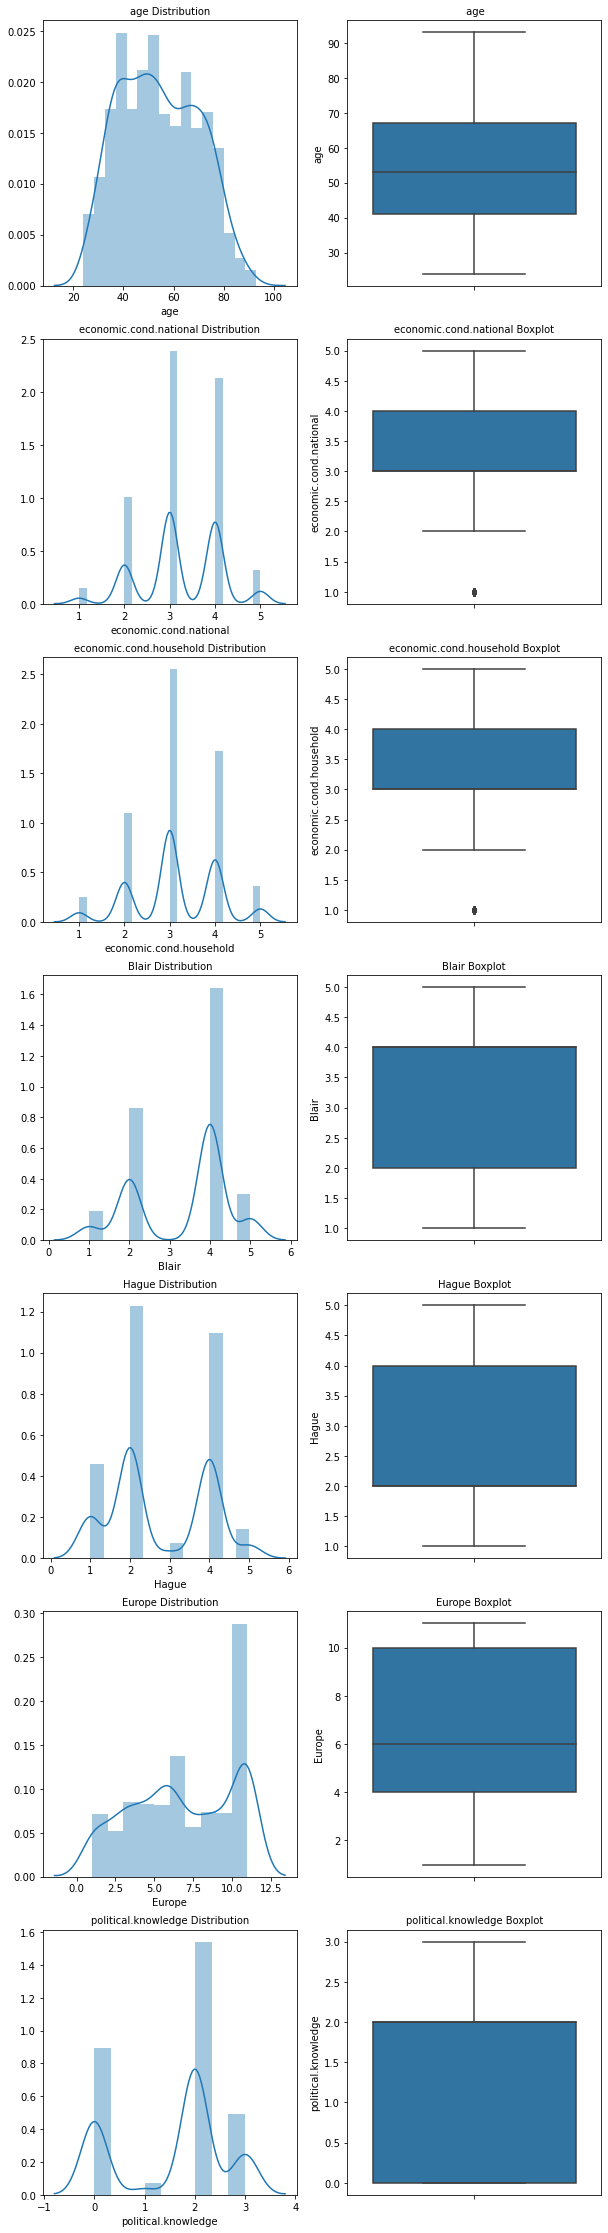

In [651]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(10,40)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title(" age",fontsize=10)

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(df['Hague'] , ax=axes[4][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[5][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(df['political.knowledge'] , ax=axes[6][0])
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show()

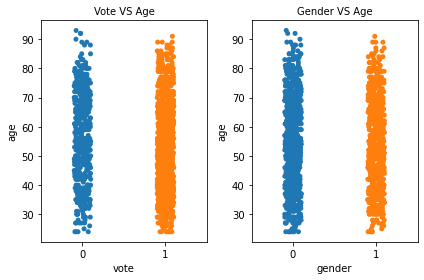

In [652]:
plt.subplot(1,2,1)
a=sns.stripplot(df['vote'],df['age'],jitter=True)
a.set_title("Vote VS Age",fontsize=10)

plt.subplot(1,2,2)
b = sns.stripplot(df['gender'],df['age'],jitter=True)
b.set_title("Gender VS Age",fontsize=10)

plt.tight_layout()
plt.show()

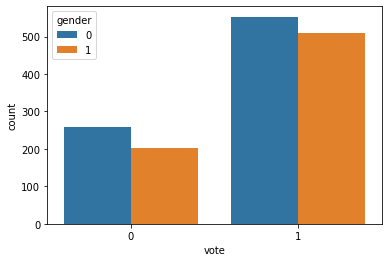

In [653]:
sns.countplot(df['vote'],hue=df['gender'])

In [654]:
df['vote'].value_counts()

1    1063
0     462
Name: vote, dtype: int64

In [655]:
df.groupby('vote').mean()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,,,,,,,,
0,56.870130,2.844156,2.893939,2.573593,3.621212,8.655844,1.720779,0.439394
1,53.014111,3.420508,3.247413,3.665099,2.366886,5.890875,1.464722,0.479774


Text(0.5, 1.0, 'Stripplot: vote VS economic.cond.national')

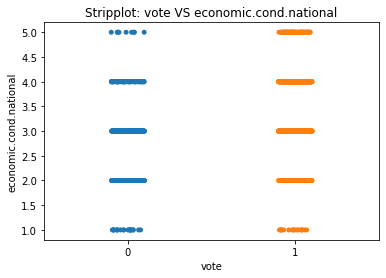

In [656]:
sns.stripplot(df['vote'],df['economic.cond.national'],jitter=True)
plt.title('Stripplot: vote VS economic.cond.national')

Text(0.5, 1.0, 'Countplot: vote VS economic.cond.national')

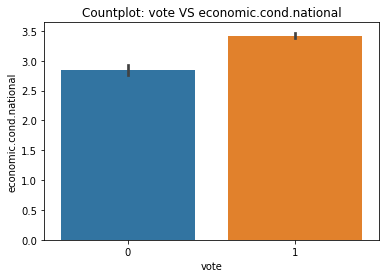

In [657]:
sns.barplot(df['vote'],df['economic.cond.national'],estimator=np.mean)
plt.title('Countplot: vote VS economic.cond.national')

Text(0.5, 1.0, 'Stripplot: vote VS economic.cond.household')

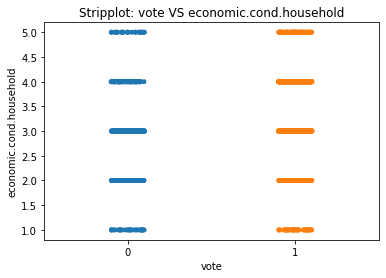

In [658]:
sns.stripplot(df['vote'],df['economic.cond.household'],jitter=True)
plt.title('Stripplot: vote VS economic.cond.household')

Text(0.5, 1.0, 'Countplot: vote VS economic.cond.household')

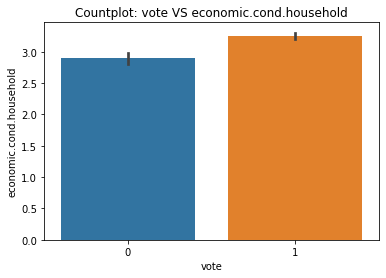

In [659]:
sns.barplot(df['vote'],df['economic.cond.household'],estimator=np.mean)
plt.title('Countplot: vote VS economic.cond.household')

Text(0.5, 1.0, 'Stripplot: vote VS Blair')

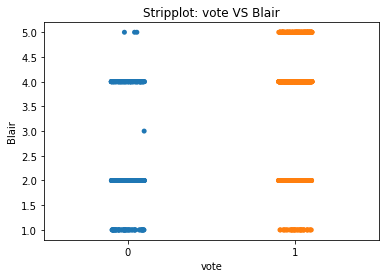

In [660]:
sns.stripplot(df['vote'],df['Blair'],jitter=True)
plt.title('Stripplot: vote VS Blair')

Text(0.5, 1.0, 'Countplot: vote VS Blair')

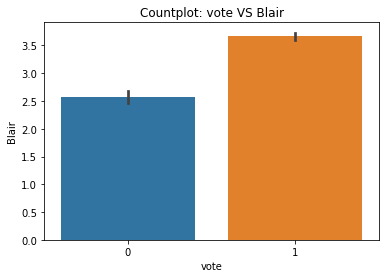

In [661]:
sns.barplot(df['vote'],df['Blair'],estimator=np.mean)
plt.title('Countplot: vote VS Blair')

Text(0.5, 1.0, 'Stripplot: vote VS Hague')

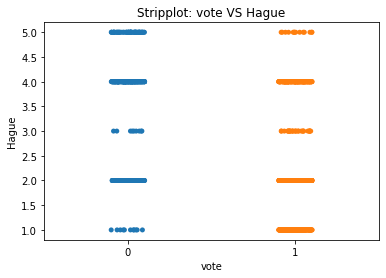

In [662]:
sns.stripplot(df['vote'],df['Hague'],jitter=True)
plt.title('Stripplot: vote VS Hague')

Text(0.5, 1.0, 'Countplot: vote VS Hague')

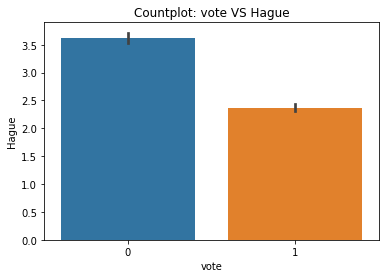

In [663]:
sns.barplot(df['vote'],df['Hague'],estimator=np.mean)
plt.title('Countplot: vote VS Hague')

Text(0.5, 1.0, 'Stripplot: vote VS Europe')

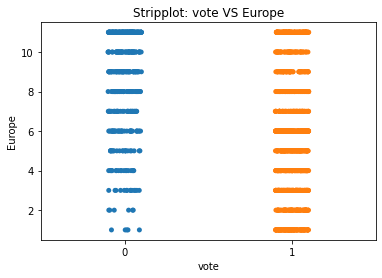

In [664]:
sns.stripplot(df['vote'],df['Europe'],jitter=True)
plt.title('Stripplot: vote VS Europe')

Text(0.5, 1.0, 'Countplot: vote VS Europe')

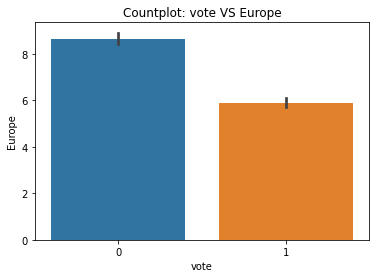

In [665]:
sns.barplot(df['vote'],df['Europe'],estimator=np.mean)
plt.title('Countplot: vote VS Europe')

Text(0.5, 1.0, 'Stripplot: vote VS political.knowledge')

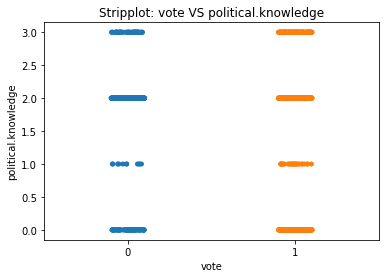

In [666]:
sns.stripplot(df['vote'],df['political.knowledge'],jitter=True)
plt.title('Stripplot: vote VS political.knowledge')

Text(0.5, 1.0, 'Countplot: vote VS political.knowledge')

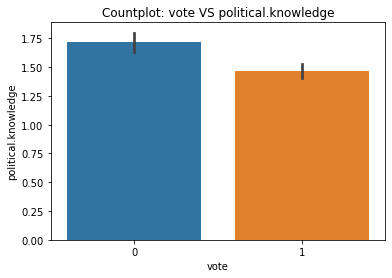

In [667]:
sns.barplot(df['vote'],df['political.knowledge'],estimator=np.mean)
plt.title('Countplot: vote VS political.knowledge')

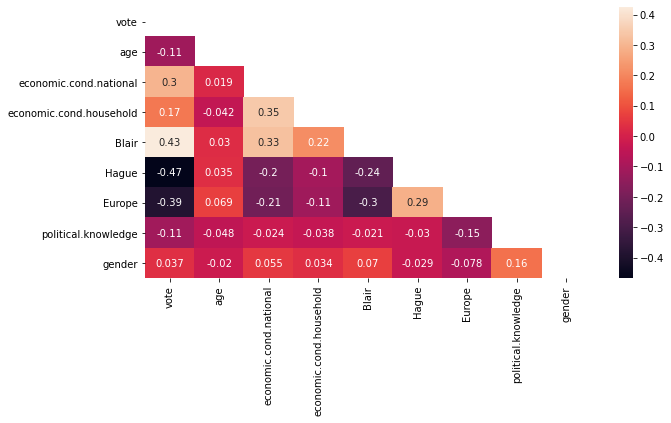

In [668]:
# Plotting the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, mask=np.triu(np.ones_like(df.corr())));

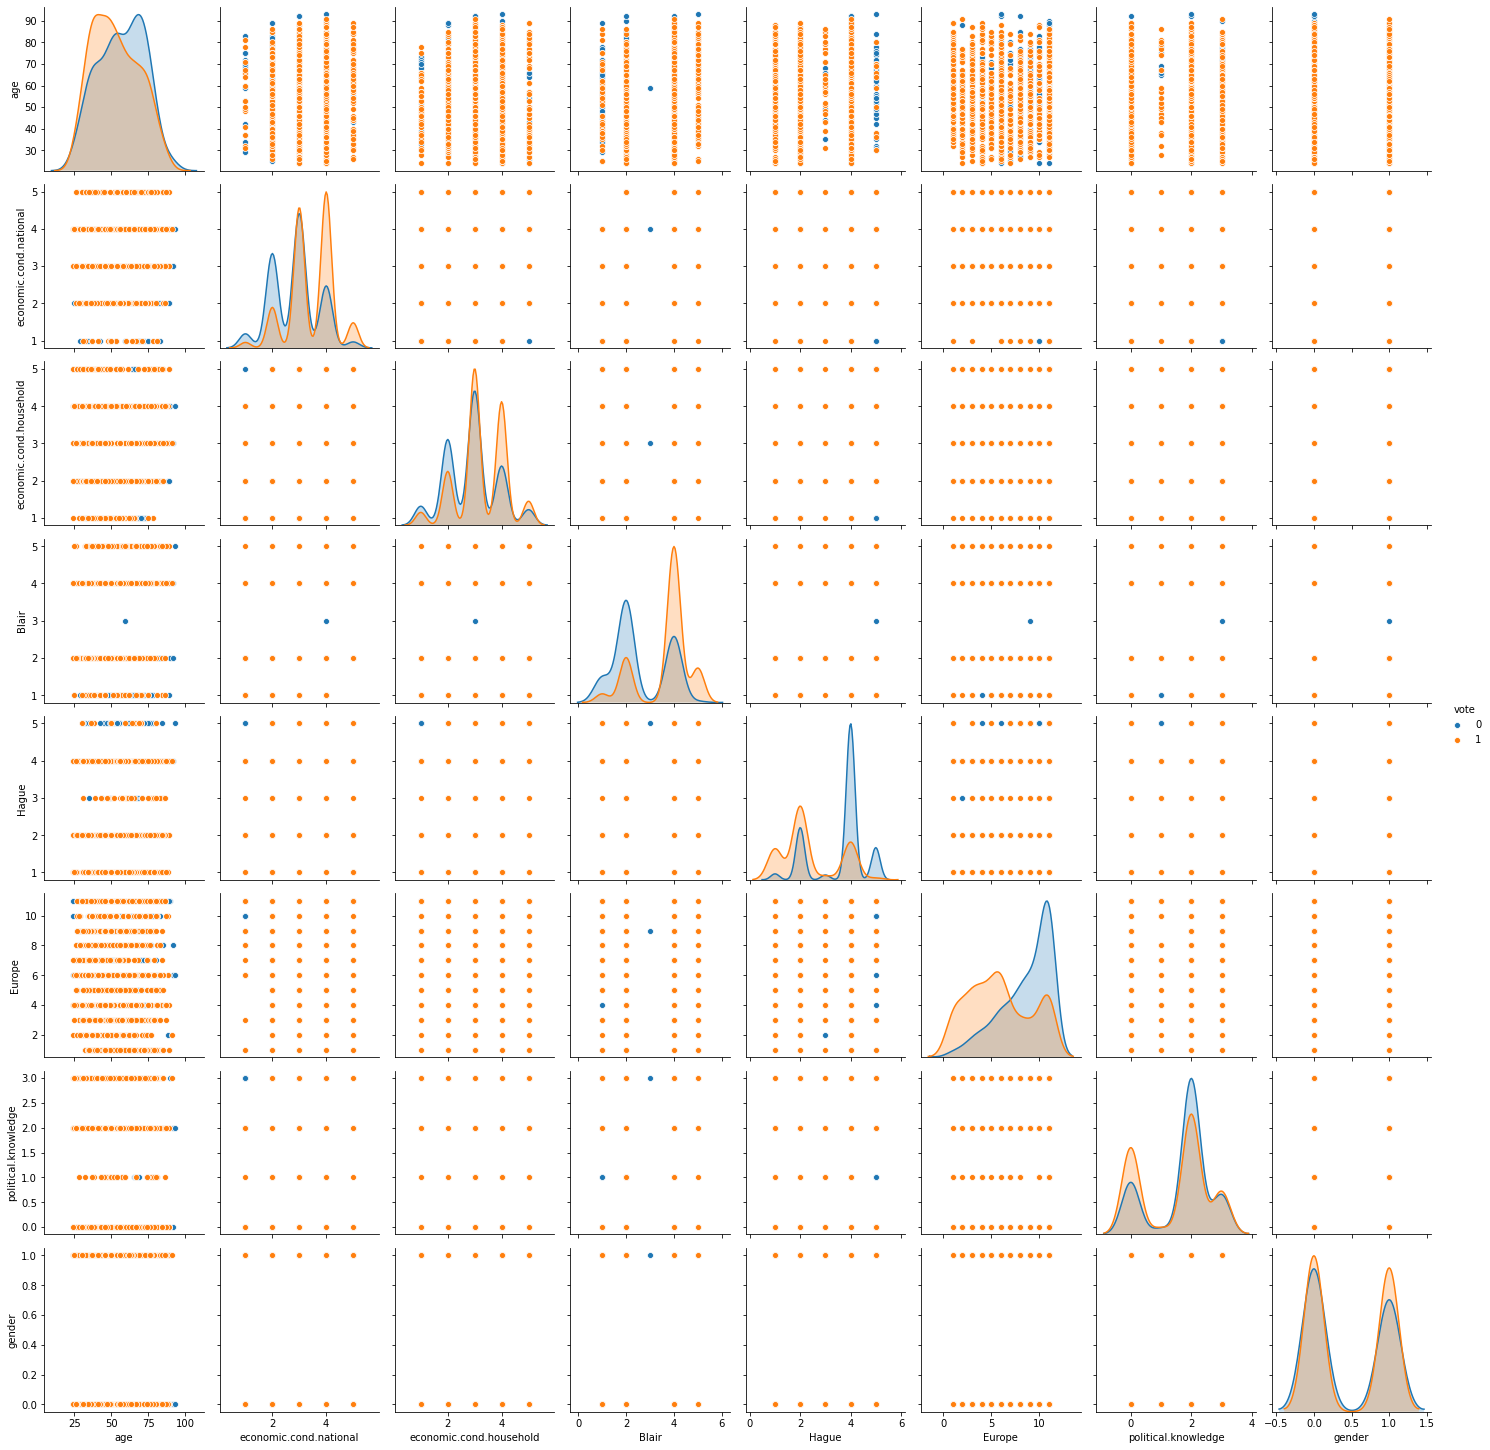

In [669]:
sns.pairplot(data=df,hue='vote')

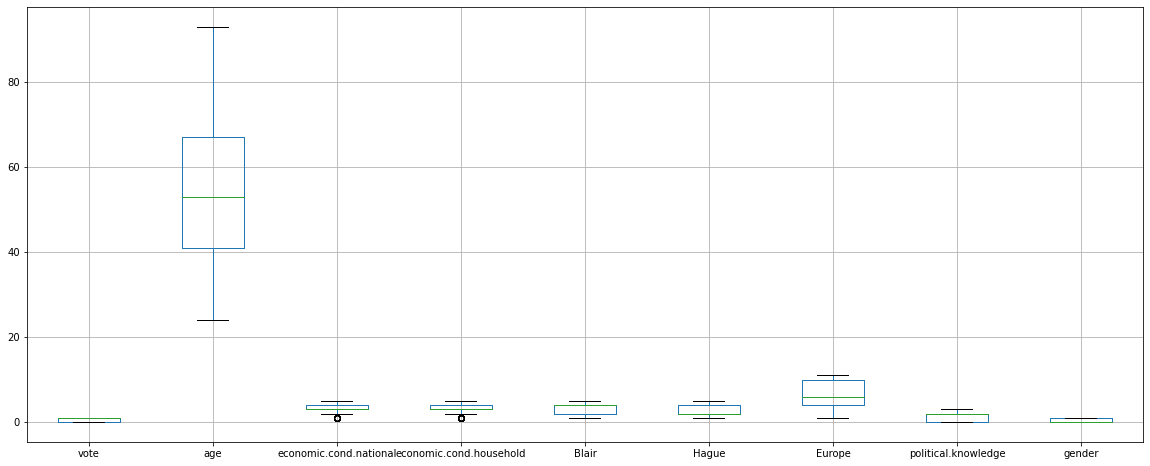

In [670]:
plt.figure(figsize=(20,8))
df.boxplot()

In [671]:
df = pd.get_dummies(data=df, columns=['vote','gender'],drop_first=True)

In [672]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_1,gender_1
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [673]:
X = df.drop('vote_1',axis=1)
y= df.pop('vote_1')

In [674]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [675]:
print("Shape of the 'X_train' dataset is {}".format(X_train.shape))

print("Shape of the 'X_test' dataset is {}".format(X_test.shape))

print("Shape of the 'y_train' dataset is {}".format(y_train.shape))

print("Shape of the 'y_test' dataset is {}".format(y_test.shape))

Shape of the 'X_train' dataset is (1067, 8)
Shape of the 'X_test' dataset is (458, 8)
Shape of the 'y_train' dataset is (1067,)
Shape of the 'y_test' dataset is (458,)


### Un-tuned Logistic Regression

In [676]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [677]:
LR_model = LogisticRegression(max_iter=100,random_state=1)

In [678]:
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

0.8397375820056232
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



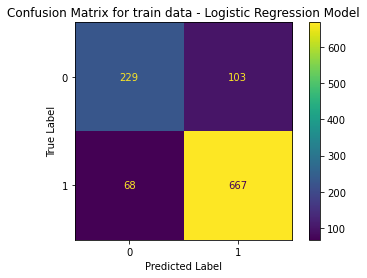

In [679]:
## Performance Matrix on train data set
y_train_predict = LR_model.predict(X_train)

LR_model_score = LR_model.score(X_train,y_train)
print(LR_model_score)

plot_confusion_matrix(LR_model,X_train,y_train)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data - Logistic Regression Model')

print(metrics.classification_report(y_train, y_train_predict))

0.8231441048034934
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



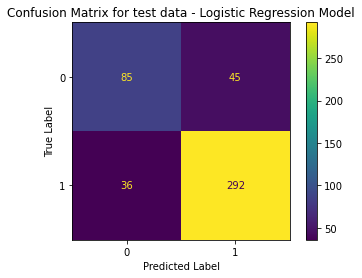

In [680]:
## Performance Matrix on test data set
y_test_predict = LR_model.predict(X_test)

LR_model_score = LR_model.score(X_test,y_test)
print(LR_model_score)

plot_confusion_matrix(LR_model,X_test,y_test)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test data - Logistic Regression Model')

print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.889


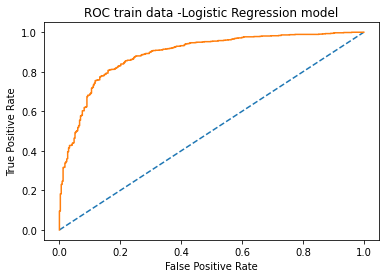

In [681]:
# predict probabilities
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
LR_train_probs = probs[:, 1]
# calculate AUC
LR_train_auc = roc_auc_score(y_train, LR_train_probs)
print('AUC: %.3f' % LR_train_auc)
# calculate roc curve
LR_train_fpr,LR_train_tpr,LR_train_thresholds = roc_curve(y_train, LR_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_train_fpr, LR_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -Logistic Regression model')
plt.show()

AUC: 0.883


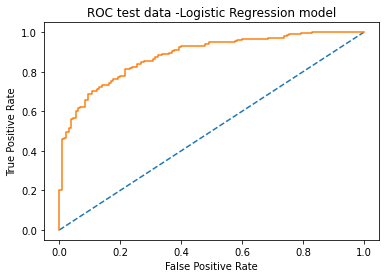

In [682]:
# predict probabilities
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
LR_test_probs = probs[:, 1]
# calculate AUC
LR_test_auc = roc_auc_score(y_test, LR_test_probs)
print('AUC: %.3f' % LR_test_auc)
# calculate roc curve
LR_test_fpr,LR_test_tpr,LR_test_thresholds = roc_curve(y_test, LR_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_test_fpr, LR_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -Logistic Regression model')
plt.show()

### Un-tuned LDA

In [683]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [684]:
LDA_model = LinearDiscriminantAnalysis()

In [685]:
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

0.8369259606373008
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



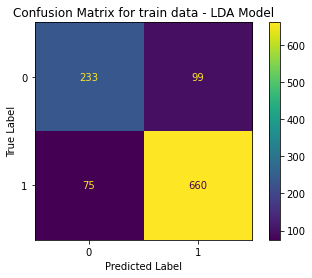

In [686]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)

LDA_model_score = LDA_model.score(X_train,y_train)
print(LDA_model_score)

plot_confusion_matrix(LDA_model,X_train,y_train)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data - LDA Model')

print(metrics.classification_report(y_train, y_train_predict))

0.8187772925764192
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



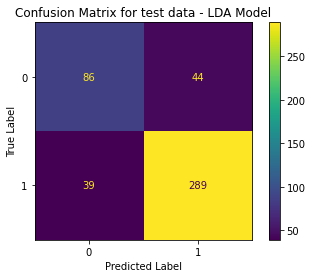

In [687]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)

LDA_model_score = LDA_model.score(X_test,y_test)
print(LDA_model_score)

plot_confusion_matrix(LDA_model,X_test,y_test)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test data - LDA Model')

print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.889


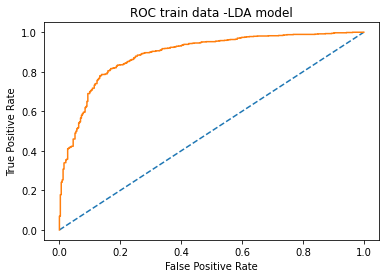

In [688]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
LDA_train_probs = probs[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train, LDA_train_probs)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_train_fpr,LDA_train_tpr,LDA_train_thresholds = roc_curve(y_train, LDA_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -LDA model')
plt.show()

AUC: 0.884


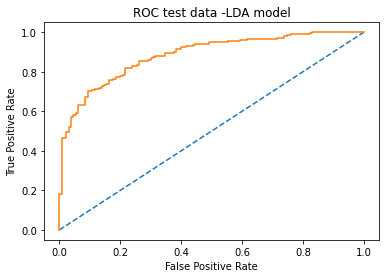

In [689]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
LDA_test_probs = probs[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test, LDA_test_probs)
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
LDA_test_fpr,LDA_test_tpr,LDA_test_thresholds = roc_curve(y_test, LDA_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -LDA model')
plt.show()

### Un-tuned Naive Bayes

In [690]:
from sklearn.naive_bayes import GaussianNB

In [691]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

0.8318777292576419
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



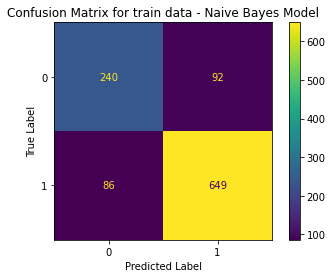

In [692]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)

NB_model_score = NB_model.score(X_train, y_train)
print(model_score)

plot_confusion_matrix(NB_model,X_train,y_train)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data - Naive Bayes Model')

print(metrics.classification_report(y_train, y_train_predict))

0.8253275109170306
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



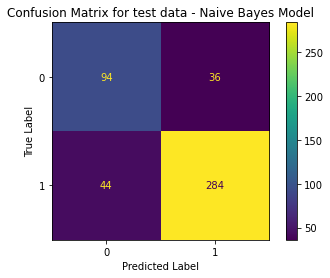

In [693]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)

model_score = NB_model.score(X_test, y_test)
print(model_score)

plot_confusion_matrix(NB_model,X_test,y_test)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test data - Naive Bayes Model')

print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.886


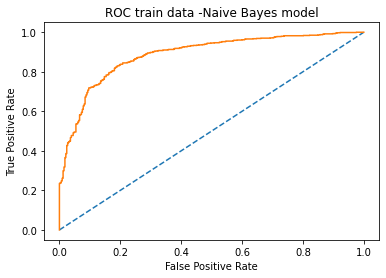

In [694]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
NB_train_probs = probs[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train, NB_train_probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr,NB_train_tpr,NB_train_thresholds = roc_curve(y_train, NB_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -Naive Bayes model')
plt.show()

AUC: 0.885


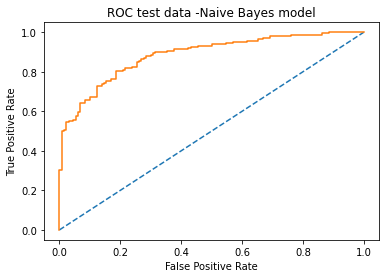

In [695]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
NB_test_probs = probs[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test, NB_test_probs)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr,NB_test_tpr,NB_test_thresholds = roc_curve(y_test, NB_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -Naive Bayes model')
plt.show()

### Un-tuned KNN

In [696]:
# Scalling the data
from scipy.stats import zscore
X_scaled = df[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender_1']].apply(zscore)

In [697]:
X_scaled.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_1
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [698]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30 , random_state=1)

In [699]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(Xs_train,y_train)

KNeighborsClassifier()

0.8253275109170306
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



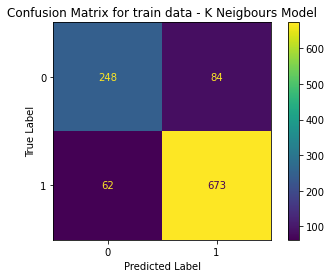

In [700]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(Xs_train)

KNN_model_score = KNN_model.score(Xs_train, y_train)
print(model_score)

plot_confusion_matrix(KNN_model,Xs_train,y_train)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data - K Neigbours Model')

print(metrics.classification_report(y_train, y_train_predict))

0.8253275109170306
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.82      0.82      0.82       458



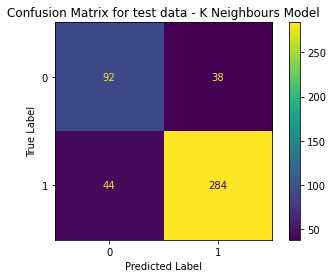

In [701]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(Xs_test)

KNN_model_score = KNN_model.score(Xs_test, y_test)
print(model_score)

plot_confusion_matrix(KNN_model,Xs_test,y_test)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test data - K Neighbours Model')

print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.781


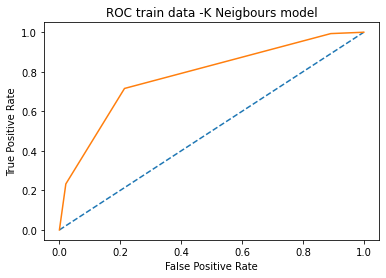

In [702]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
KNN_train_probs = probs[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train, KNN_train_probs)
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr,KNN_train_tpr,KNN_train_thresholds = roc_curve(y_train, KNN_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -K Neigbours model')
plt.show()

AUC: 0.787


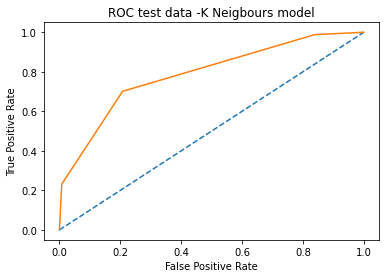

In [703]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
KNN_test_probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test, KNN_test_probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr,KNN_test_tpr,KNN_test_thresholds = roc_curve(y_test, KNN_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -K Neigbours model')
plt.show()

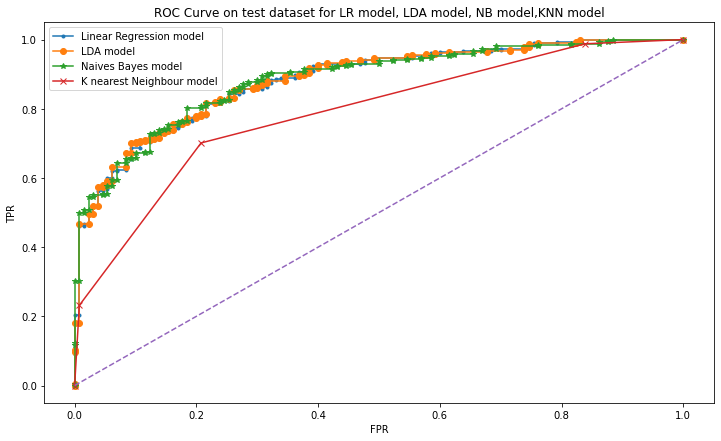

In [704]:
# AUC Comparison
models=[LR_model, LDA_model, KNN_model, NB_model]

models_names={LR_model:'Linear Regression model',LDA_model:'LDA model',NB_model:'Naives Bayes model',KNN_model:'K nearest Neighbour model'}

plt.figure(figsize=(12,7))
LR_test_fpr,LR_test_tpr,LR_test_thresholds=roc_curve(y_test,LR_test_probs)
plt.plot(LR_test_fpr,LR_test_tpr,marker='.')

LDA_test_fpr,LDA_test_tpr,LDA_test_thresholds=roc_curve(y_test,LDA_test_probs)
plt.plot(LDA_test_fpr,LDA_test_tpr,marker='o')

NB_test_fpr,NB_test_tpr,NB_test_thresholds=roc_curve(y_test,NB_test_probs)
plt.plot(NB_test_fpr,NB_test_tpr,marker='*')

KNN_test_fpr,KNN_test_tpr,KNN_test_thresholds=roc_curve(y_test,KNN_test_probs)
plt.plot(KNN_test_fpr,KNN_test_tpr,marker='x')

plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve on test dataset for {}'.format('LR model, LDA model, NB model,KNN model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

### Model Tunning

##### Tuned Logistic Regression

In [705]:
from sklearn.model_selection import GridSearchCV

In [706]:
# Applying GridSearchCV for Logistic Regression
grid={'penalty':['l1','l2','none',['l1','l2'],['elasticnet','l1','l2','none']],
      'solver':['newton-cg','sag','saga','lbfgs','liblinear'],
      'tol':[0.001,0.0001,0.00001,0.000001]}

In [707]:
LR_model = LogisticRegression(max_iter=1000,n_jobs=2,random_state=1)

In [708]:
grid_search = GridSearchCV(estimator = LR_model, param_grid = grid, cv =10,n_jobs=2,scoring='f1')

In [709]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, n_jobs=2,
                                          random_state=1),
             n_jobs=2,
             param_grid={'penalty': ['l1', 'l2', 'none', ['l1', 'l2'],
                                     ['elasticnet', 'l1', 'l2', 'none']],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs',
                                    'liblinear'],
                         'tol': [0.001, 0.0001, 1e-05, 1e-06]},
             scoring='f1')

In [710]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=1000, n_jobs=2, penalty='l1', random_state=1,
                   solver='liblinear')


In [711]:
LR_tun_model = grid_search.best_estimator_

0.8416119962511716
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



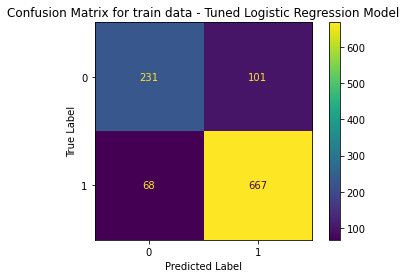

In [712]:
## Performance Matrix on train data set
y_train_predict = LR_tun_model.predict(X_train)

LR_tun_model_score = LR_tun_model.score(X_train,y_train)
print(LR_tun_model_score)

plot_confusion_matrix(LR_tun_model,X_train,y_train)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data - Tuned Logistic Regression Model')

print(metrics.classification_report(y_train, y_train_predict))

0.8209606986899564
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



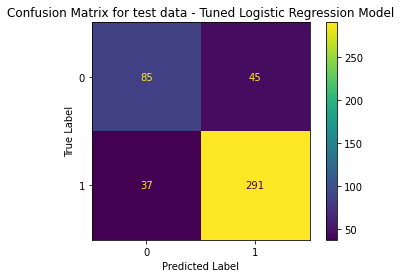

In [713]:
## Performance Matrix on test data set
y_test_predict = LR_tun_model.predict(X_test)

LR_tun_model_score = LR_tun_model.score(X_test,y_test)
print(LR_tun_model_score)

plot_confusion_matrix(LR_tun_model,X_test,y_test)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test data - Tuned Logistic Regression Model')

print(metrics.classification_report(y_test, y_test_predict))

In [847]:
# predict probabilities
probs = LR_tun_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
LR_tun_train_probs = probs[:, 1]
# calculate AUC
LR_tun_train_auc = roc_auc_score(y_train, LR_tun_train_probs)
print('AUC: %.3f' % LR_tun_train_auc)

probs = LR_tun_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
LR_tun_test_probs = probs[:, 1]
# calculate AUC
LR_tun_test_auc = roc_auc_score(y_test, LR_tun_test_probs)
print('AUC: %.3f' % LR_tun_test_auc)

AUC: 0.890
AUC: 0.884


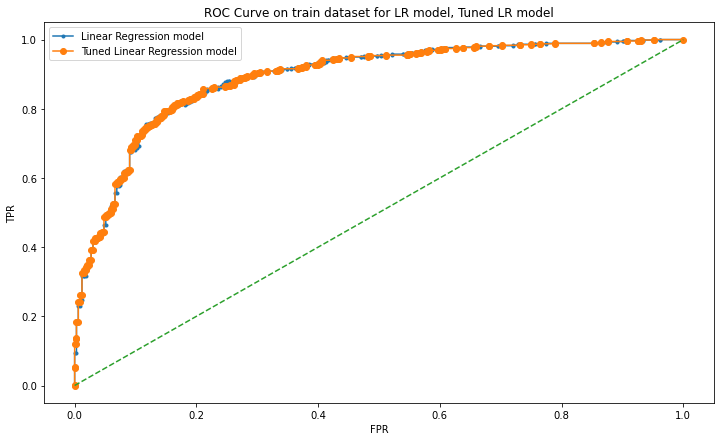

In [715]:
# AUC Comparison
models=[LR_model, LR_tun_model]

models_names={LR_model:'Linear Regression model',LR_tun_model:'Tuned Linear Regression model'}

plt.figure(figsize=(12,7))
LR_train_fpr,LR_train_tpr,LR_train_thresholds=roc_curve(y_train,LR_train_probs)
plt.plot(LR_train_fpr,LR_train_tpr,marker='.')

LR_tun_train_fpr,LR_tun_train_tpr,LR_tun_train_thresholds=roc_curve(y_train,LR_tun_train_probs)
plt.plot(LR_tun_train_fpr,LR_tun_train_tpr,marker='o')

plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve on train dataset for {}'.format('LR model, Tuned LR model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

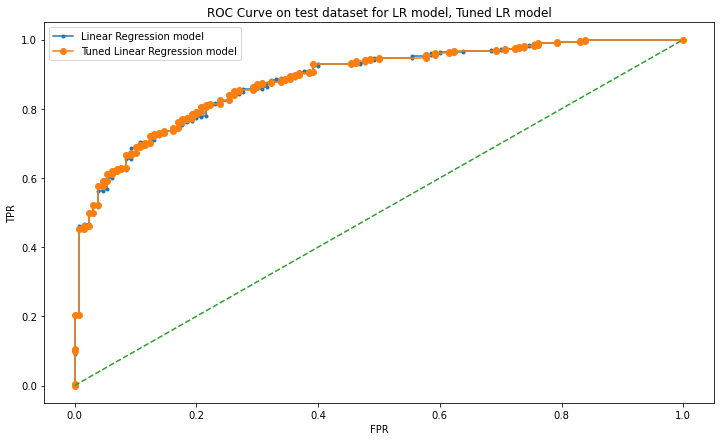

In [716]:
# AUC Comparison
models=[LR_model, LR_tun_model]

models_names={LR_model:'Linear Regression model',LR_tun_model:'Tuned Linear Regression model'}

plt.figure(figsize=(12,7))
LR_test_fpr,LR_test_tpr,LR_test_thresholds=roc_curve(y_test,LR_test_probs)
plt.plot(LR_test_fpr,LR_test_tpr,marker='.')

LR_tun_test_fpr,LR_tun_test_tpr,LR_tun_test_thresholds=roc_curve(y_test,LR_tun_test_probs)
plt.plot(LR_tun_test_fpr,LR_tun_test_tpr,marker='o')

plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve on test dataset for {}'.format('LR model, Tuned LR model'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

##### Tuned LDA

In [717]:
LDA_tun_model = LinearDiscriminantAnalysis(solver='lsqr',tol=0.001)

In [718]:
LDA_tun_model.fit(X_train,y_train)

LinearDiscriminantAnalysis(solver='lsqr', tol=0.001)

0.1 

Accuracy Score 0.69
F1 Score 0.8117 

Confusion Matrix


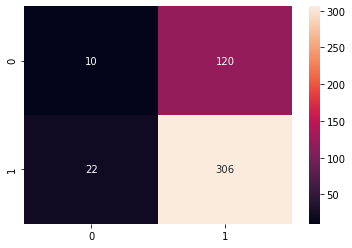

0.2 

Accuracy Score 0.6659
F1 Score 0.7895 

Confusion Matrix


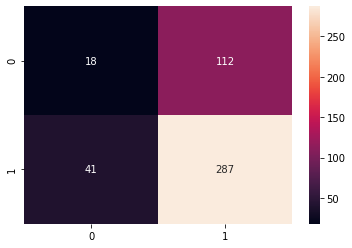

0.3 

Accuracy Score 0.6332
F1 Score 0.7607 

Confusion Matrix


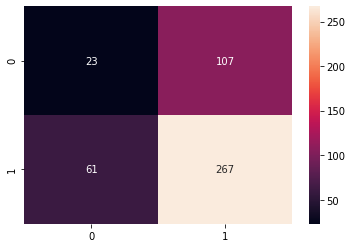

0.4 

Accuracy Score 0.6135
F1 Score 0.7408 

Confusion Matrix


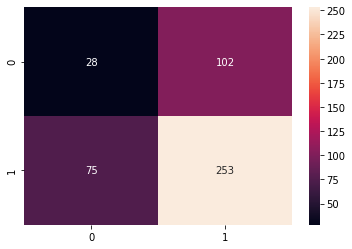

0.5 

Accuracy Score 0.5895
F1 Score 0.7177 

Confusion Matrix


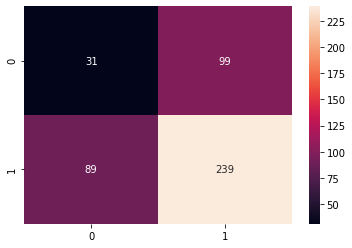

0.6 

Accuracy Score 0.5655
F1 Score 0.6924 

Confusion Matrix


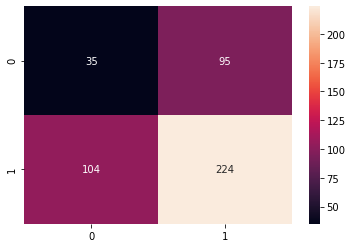

0.7 

Accuracy Score 0.5568
F1 Score 0.6742 

Confusion Matrix


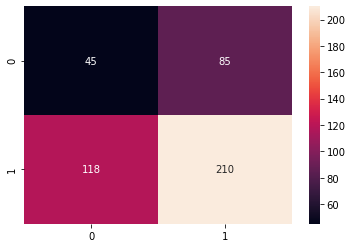

0.8 

Accuracy Score 0.5415
F1 Score 0.6429 

Confusion Matrix


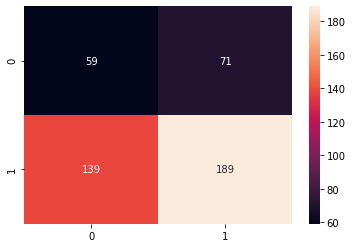

0.9 

Accuracy Score 0.5197
F1 Score 0.5849 

Confusion Matrix


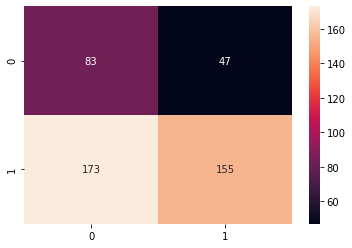

In [719]:
#### We will change the cut-off values to find out optimal value which gives high accuracy and F1-score
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_test)):#defining a loop for the length of the traain data
        if np.array(LDA_tun_train_probs)[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_test,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_test,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_test,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

Cut-off value 

Accuracy Score 0.8304
F1 Score 0.8824 

Confusion Matrix


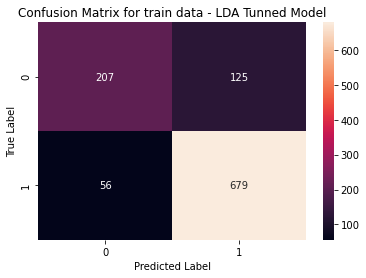

In [720]:

custom_cutoff_train_data=[]#defining an empty list
for i in range(0,len(y_train)):#defining a loop for the length of the traain data
    if np.array(LDA_tun_train_probs)[i] > 0.4:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
        a=1#if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0#if the probability values are less than the custom cutoff then the value should be 0
    custom_cutoff_train_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
print('Cut-off value','\n')
print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_train_data),4))
print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_train_data),4),'\n')
plt.figure(figsize=(6,4))
print('Confusion Matrix')
sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_train_data),annot=True,fmt='.4g'),'\n\n'
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data - LDA Tunned Model')
plt.show();

Cut-off value 

Accuracy Score 0.8297
F1 Score 0.8853 

Confusion Matrix


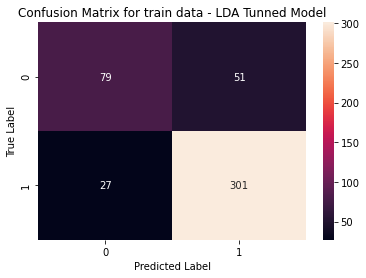

In [844]:

custom_cutoff_test_data=[]#defining an empty list
for i in range(0,len(y_test)):#defining a loop for the length of the traain data
    if np.array(LDA_tun_test_probs)[i] > 0.4:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
        a=1#if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0#if the probability values are less than the custom cutoff then the value should be 0
    custom_cutoff_test_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
print('Cut-off value','\n')
print('Accuracy Score',round(metrics.accuracy_score(y_test,custom_cutoff_test_data),4))
print('F1 Score',round(metrics.f1_score(y_test,custom_cutoff_test_data),4),'\n')
plt.figure(figsize=(6,4))
print('Confusion Matrix')
sns.heatmap(metrics.confusion_matrix(y_test,custom_cutoff_test_data),annot=True,fmt='.4g'),'\n\n'
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data - LDA Tunned Model')
plt.show();

In [722]:
print(metrics.classification_report(y_train, custom_cutoff_train_data))

              precision    recall  f1-score   support

           0       0.79      0.62      0.70       332
           1       0.84      0.92      0.88       735

    accuracy                           0.83      1067
   macro avg       0.82      0.77      0.79      1067
weighted avg       0.83      0.83      0.82      1067



In [723]:
print(metrics.classification_report(y_test, custom_cutoff_test_data))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67       130
           1       0.86      0.92      0.89       328

    accuracy                           0.83       458
   macro avg       0.80      0.76      0.78       458
weighted avg       0.82      0.83      0.82       458



AUC: 0.889


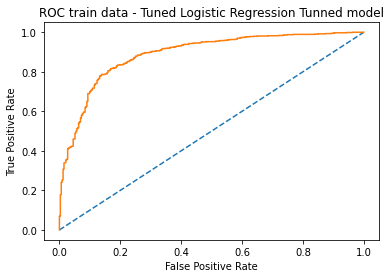

In [841]:
# predict probabilities
probs = LDA_tun_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
LDA_tun_train_probs = probs[:, 1]
# calculate AUC
LDA_tun_train_auc = roc_auc_score(y_train, LDA_tun_train_probs)
print('AUC: %.3f' % LDA_tun_train_auc)
# calculate roc curve
LDA_tun_train_fpr,LDA_tun_train_tpr,LDA_tun_train_thresholds = roc_curve(y_train, LDA_tun_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_tun_train_fpr, LDA_tun_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data - Tuned Logistic Regression Tunned model')
plt.show()

AUC: 0.884


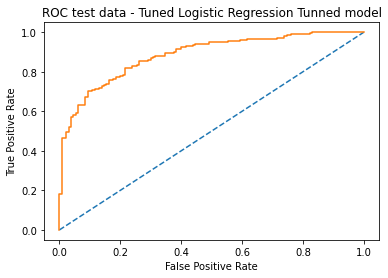

In [843]:
# predict probabilities
probs = LDA_tun_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
LDA_tun_test_probs = probs[:, 1]
# calculate AUC
LDA_tun_test_auc = roc_auc_score(y_test, LDA_tun_test_probs)
print('AUC: %.3f' % LDA_tun_test_auc)
# calculate roc curve
LDA_tun_test_fpr,LDA_tun_test_tpr,LDA_tun_test_thresholds = roc_curve(y_test, LDA_tun_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_tun_test_fpr, LDA_tun_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data - Tuned Logistic Regression Tunned model')
plt.show()

##### Tuned Naive Bayes

In [757]:
# we will use SMOTE to improve the model
from imblearn.over_sampling import SMOTE

In [778]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [759]:
y_train_res.shape

(1470,)

In [760]:
y_train.value_counts()

1    735
0    332
Name: vote_1, dtype: int64

In [761]:
y_train_res.shape

(1470,)

In [762]:
y_res = pd.Series(y_train_res)
y_res.value_counts()

0    735
1    735
dtype: int64

In [763]:
NB_model_res = GaussianNB()
NB_model_res.fit(X_train_res, y_train_res)

GaussianNB()

In [772]:
## Performance Matrix on train data set
y_train_predict = NB_model_res.predict(X_train_res)

NB_model_res_score = NB_model_res.score(X_train_res, y_train_predict)
print(model_score)

print(metrics.confusion_matrix(y_train_res, y_train_predict))

print(metrics.classification_report(y_train_res, y_train_predict))

0.8253275109170306
[[596 139]
 [119 616]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       735
           1       0.82      0.84      0.83       735

    accuracy                           0.82      1470
   macro avg       0.82      0.82      0.82      1470
weighted avg       0.82      0.82      0.82      1470



In [773]:
## Performance Matrix on test data set
y_test_predict = NB_model_res.predict(X_test)

NB_model_res_score = NB_model_res.score(X_test, y_test_predict)
print(model_score)

print(metrics.confusion_matrix(y_test, y_test_predict))

print(metrics.classification_report(y_test, y_test_predict))

0.8253275109170306
[[103  27]
 [ 65 263]]
              precision    recall  f1-score   support

           0       0.61      0.79      0.69       130
           1       0.91      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.82      0.80      0.81       458



AUC: 0.886


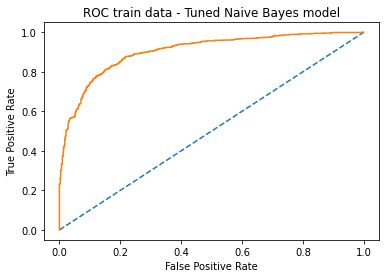

In [774]:
# predict probabilities
probs = NB_model_res.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
NB_model_res_probs = probs[:, 1]
# calculate AUC
NB_res_train_auc = roc_auc_score(y_train_res, NB_model_res_probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_res_train_fpr,NB_res_train_tpr,NB_res_train_thresholds = roc_curve(y_train_res, NB_model_res_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_res_train_fpr, NB_res_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data - Tuned Naive Bayes model')
plt.show()

AUC: 0.886


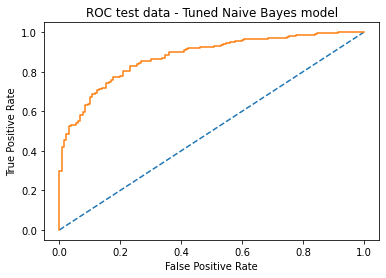

In [775]:
# predict probabilities
probs = NB_model_res.predict_proba(X_test)
# keep probabilities for the positive outcome only
NB_model_res_probs = probs[:, 1]
# calculate AUC
NB_res_test_auc = roc_auc_score(y_test, NB_model_res_probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_res_test_fpr,NB_res_test_tpr,NB_res_test_thresholds = roc_curve(y_test, NB_model_res_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_res_test_fpr, NB_res_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data - Tuned Naive Bayes model')
plt.show()

In [776]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_model_res, X_train_res, y_train_res, cv=10)
scores

array([0.78231293, 0.78231293, 0.84353741, 0.82993197, 0.82993197,
       0.88435374, 0.81632653, 0.81632653, 0.82312925, 0.81632653])

In [777]:
scores = cross_val_score(NB_model_res, X_test, y_test, cv=10)
scores

array([0.82608696, 0.84782609, 0.82608696, 0.80434783, 0.76086957,
       0.80434783, 0.84782609, 0.91304348, 0.88888889, 0.82222222])

##### Tuned KNN

In [780]:
# we will use SMOTE to improve the model
from imblearn.over_sampling import SMOTE

In [781]:
sm = SMOTE(random_state=1)
Xs_train_res, y_train_res = sm.fit_resample(Xs_train, y_train.ravel()) #using scaled data

In [782]:
KNN_model=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
KNN_model.fit(Xs_train_res,y_train_res)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [786]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(Xs_train_res)

KNN_res_model_score = KNN_model.score(Xs_train_res, y_train_res)
print(model_score)

print(metrics.confusion_matrix(y_train_res, y_train_predict))

print(metrics.classification_report(y_train_res, y_train_predict))

0.8253275109170306
[[685  50]
 [132 603]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       735
           1       0.92      0.82      0.87       735

    accuracy                           0.88      1470
   macro avg       0.88      0.88      0.88      1470
weighted avg       0.88      0.88      0.88      1470



In [787]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(Xs_test)

KNN_model_score = KNN_model.score(Xs_test, y_test)
print(model_score)

print(metrics.confusion_matrix(y_test, y_test_predict))

print(metrics.classification_report(y_test, y_test_predict))

0.8253275109170306
[[108  22]
 [ 74 254]]
              precision    recall  f1-score   support

           0       0.59      0.83      0.69       130
           1       0.92      0.77      0.84       328

    accuracy                           0.79       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.83      0.79      0.80       458



AUC: 0.955


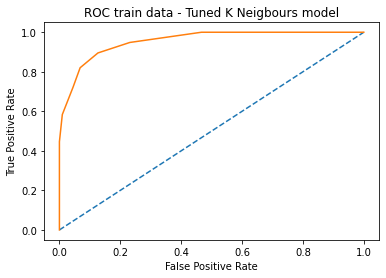

In [790]:
# predict probabilities
probs = KNN_model.predict_proba(Xs_train_res)
# keep probabilities for the positive outcome only
KNN_res_train_probs = probs[:, 1]
# calculate AUC
KNN_res_train_auc = roc_auc_score(y_train_res, KNN_res_train_probs)
print('AUC: %.3f' % KNN_res_train_auc)
# calculate roc curve
KNN_res_train_fpr,KNN_res_train_tpr,KNN_res_train_thresholds = roc_curve(y_train_res, KNN_res_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_res_train_fpr, KNN_res_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data - Tuned K Neigbours model')
plt.show()

AUC: 0.873


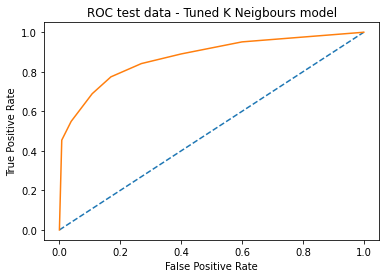

In [791]:
# predict probabilities
probs = KNN_model.predict_proba(Xs_test)
# keep probabilities for the positive outcome only
KNN_res_test_probs = probs[:, 1]
# calculate AUC
KNN_res_test_auc = roc_auc_score(y_test, KNN_res_test_probs)
print('AUC: %.3f' % KNN_res_test_auc)
# calculate roc curve
KNN_res_test_fpr,KNN_res_test_tpr,KNN_res_test_thresholds = roc_curve(y_test, KNN_res_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_res_test_fpr, KNN_res_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data - Tuned K Neigbours model')
plt.show()

### Bagging

In [826]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [827]:
rfcl = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

0.9653233364573571
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       332
           1       0.96      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067



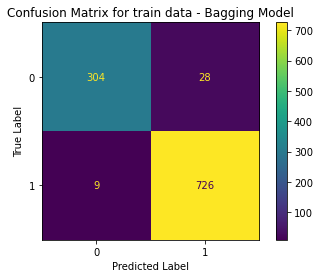

In [828]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)

model_score =Bagging_model.score(X_train, y_train)
print(model_score)

plot_confusion_matrix(Bagging_model,X_train,y_train)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data - Bagging Model')

print(metrics.classification_report(y_train, y_train_predict))

0.8362445414847162
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



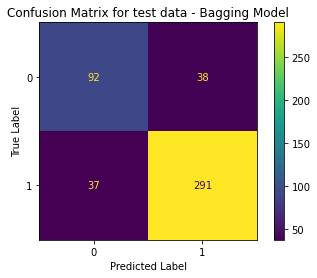

In [829]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)

model_score = Bagging_model.score(X_test, y_test)
print(model_score)

plot_confusion_matrix(Bagging_model,X_test,y_test)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test data - Bagging Model')

print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.997


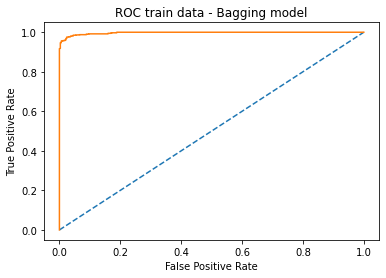

In [830]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Bagging_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % Bagging_train_auc)
# calculate roc curve
Bagging_train_fpr,Bagging_train_tpr,Bagging_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Bagging_train_fpr, Bagging_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data - Bagging model')
plt.show()

AUC: 0.897


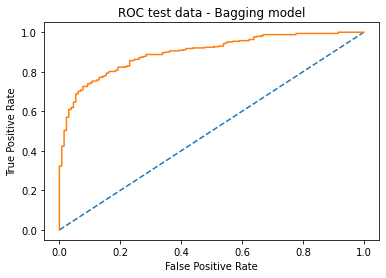

In [831]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Bagging_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % Bagging_test_auc)
# calculate roc curve
Bagging_test_fpr,Bagging_test_tpr,Bagging_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Bagging_test_fpr, Bagging_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data - Bagging model')
plt.show()

### Boosting

#### Ada Boost

In [832]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

0.8472352389878163
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



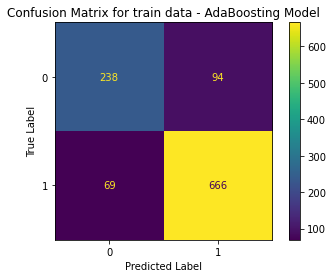

In [833]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)

model_score = ADB_model.score(X_train, y_train)
print(model_score)

plot_confusion_matrix(ADB_model,X_train,y_train)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data - AdaBoosting Model')

print(metrics.classification_report(y_train, y_train_predict))

0.8187772925764192
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



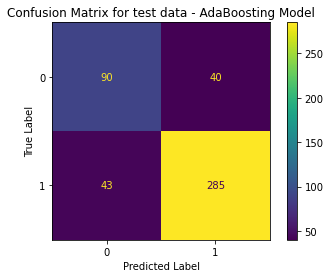

In [834]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)

model_score = ADB_model.score(X_test, y_test)
print(model_score)

plot_confusion_matrix(ADB_model,X_test,y_test)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test data - AdaBoosting Model')

print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.913


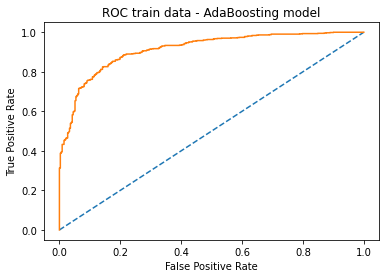

In [835]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ADB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ADB_train_auc)
# calculate roc curve
ADB_train_fpr,ADB_train_tpr,ADB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_train_fpr, ADB_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data - AdaBoosting model')
plt.show()

AUC: 0.879


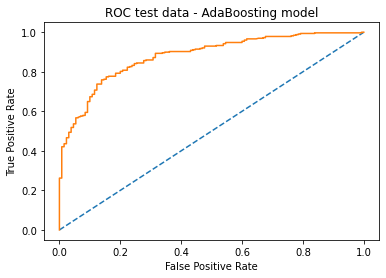

In [836]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ADB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ADB_test_auc)
# calculate roc curve
ADB_test_fpr,ADB_test_tpr,ADB_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_test_fpr, ADB_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data - AdaBoosting model')
plt.show()

#### Gradient Boost

In [821]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=100,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8865979381443299
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



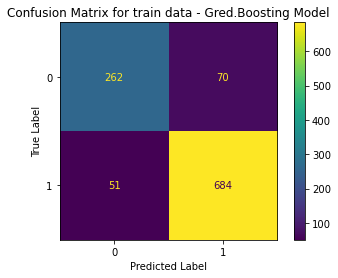

In [822]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)

model_score = gbcl.score(X_train, y_train)
print(model_score)

plot_confusion_matrix(gbcl,X_train,y_train)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data - Gred.Boosting Model')

print(metrics.classification_report(y_train, y_train_predict))

0.8318777292576419
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



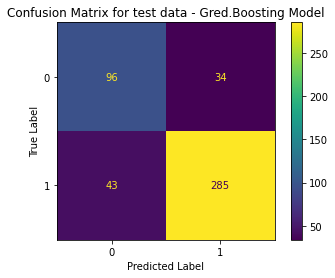

In [823]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)

model_score = gbcl.score(X_test, y_test)
print(model_score)

plot_confusion_matrix(gbcl,X_test,y_test)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test data - Gred.Boosting Model')

print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.950


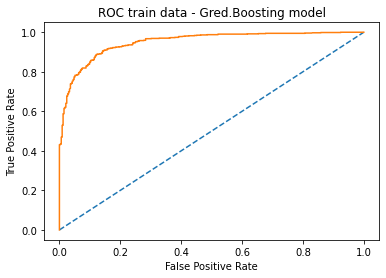

In [824]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr,gbcl_train_tpr,gbcl_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data - Gred.Boosting model')
plt.show()

AUC: 0.904


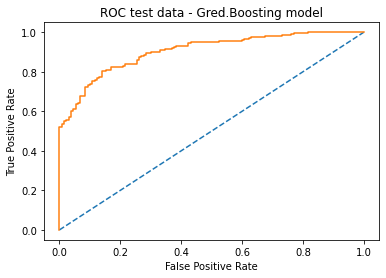

In [825]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr,gbcl_test_tpr,gbcl_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data - Gred.Boosting model')
plt.show()

### Model Comparison for Performance

In [ ]:
# Comparison is done in the excel, same is been attached along with project report.

# Problem 2

In [848]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
nltk.download('inaugural')
from nltk.corpus import inaugural
nltk.download('punkt')
import random
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\91866\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91866\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [849]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [850]:
# Lets see the raw speech text for each of the President
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [851]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [852]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [853]:
# Creating variable for each of the speeches
df_rv = inaugural.raw('1941-Roosevelt.txt')
df_kn = inaugural.raw('1961-Kennedy.txt')
df_nx = inaugural.raw('1973-Nixon.txt')

#### No. of characters in each speech

In [854]:

print('The total number of characters in the 1941-Roosevelt inaugural are {}.'.format(len(df_rv)))
print('')
print('The total number of characters in the 1941-Kennedy inaugural are {}.'.format(len(df_kn)))
print('')
print('The total number of characters in the 1941-Nixon inaugural are {}.'.format(len(df_nx)))
print('')

The total number of characters in the 1941-Roosevelt inaugural are 7571.

The total number of characters in the 1941-Kennedy inaugural are 7618.

The total number of characters in the 1941-Nixon inaugural are 9991.



#### No. of words in each speech

In [855]:

print('The total number of words in the 1941-Roosevelt inaugural are {}.'.format(len(inaugural.words('1941-Roosevelt.txt'))))
print('')
print('The total number of words in the 1941-Kennedy inaugural are {}.'.format(len(inaugural.words('1961-Kennedy.txt'))))
print('')
print('The total number of words in the 1941-Nixon inaugural are {}.'.format(len(inaugural.words('1973-Nixon.txt'))))
print('')

The total number of words in the 1941-Roosevelt inaugural are 1536.

The total number of words in the 1941-Kennedy inaugural are 1546.

The total number of words in the 1941-Nixon inaugural are 2028.



#### No. of sentences in each speech

In [856]:

print('The total number of sentences in the 1941-Roosevelt inaugural are {}.'.format(len(inaugural.sents('1941-Roosevelt.txt'))))
print('')
print('The total number of sentences in the 1941-Kennedy inaugural are {}.'.format(len(inaugural.sents('1961-Kennedy.txt'))))
print('')
print('The total number of sentences in the 1941-Nixon inaugural are {}.'.format(len(inaugural.sents('1973-Nixon.txt'))))
print('')

The total number of sentences in the 1941-Roosevelt inaugural are 68.

The total number of sentences in the 1941-Kennedy inaugural are 52.

The total number of sentences in the 1941-Nixon inaugural are 69.



#### Removing the stopwords from each of the speeches

In [857]:

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91866\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [858]:
st = PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["-","--","#","us","let","know"])

In [859]:

Roosevelt_lwr = (w.lower() for w in inaugural.words('1941-Roosevelt.txt')) # converting to lower case
Roosevelt_stp = [word for word in Roosevelt_lwr if word not in stopwords] # extracting the non-stopwords
Roosevelt_st = [st.stem(word) for word in Roosevelt_stp] # Stemming the words
Roosevelt_fq = nltk.FreqDist(Roosevelt_st)

In [860]:
Kennedy_lwr = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
Kennedy_stp = [word for word in Kennedy_lwr if word not in stopwords]
Kennedy_st = [st.stem(word) for word in Kennedy_stp]
Kennedy_fq = nltk.FreqDist(Kennedy_st)

In [861]:
Nixon_lwr = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
Nixon_stp = [word for word in Nixon_lwr if word not in stopwords]
Nixon_st = [st.stem(word) for word in Nixon_stp]
Nixon_fq = nltk.FreqDist(Nixon_st)

#### Word count before and after removing the stopwords

In [870]:
print('1941-Roosevelt Inaugural Corpus')
print('Word count before removing the stopwords: {}'.format(len(inaugural.words('1941-Roosevelt.txt'))))
print('Word count after removing the stopwords: {}'.format(len(Roosevelt_stp)))

1941-Roosevelt Inaugural Corpus
Word count before removing the stopwords: 1536
Word count after removing the stopwords: 613


In [871]:
print('1961-Kennedy Inaugural Corpus')
print('Word count before removing the stopwords: {}'.format(len(inaugural.words('1961-Kennedy.txt'))))
print('Word count after removing the stopwords: {}'.format(len(Kennedy_stp)))

1961-Kennedy Inaugural Corpus
Word count before removing the stopwords: 1546
Word count after removing the stopwords: 666


In [872]:
print('1973-Nixon Inaugural Corpus')
print('Word count before removing the stopwords: {}'.format(len(inaugural.words('1973-Nixon.txt'))))
print('Word count after removing the stopwords: {}'.format(len(Nixon_stp)))

1973-Nixon Inaugural Corpus
Word count before removing the stopwords: 2028
Word count after removing the stopwords: 788


In [888]:
# Rejoining the words in speech after removal of stopwords
Roosevelt_rejoin=' '.join(Roosevelt_stp)
print(Roosevelt_rejoin)

national day inauguration since 1789 people renewed sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man three score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding life ideals measured material things vital prese

In [889]:
# Rejoining the words in speech after removal of stopwords
Kennedy_rejoin=' '.join(Kennedy_stp)
print(Kennedy_rejoin)

vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation whether wishes well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival success liberty m

In [890]:
# Rejoining the words in speech after removal of stopwords
Nixon_rejoin=' '.join(Nixon_stp)
print(Nixon_rejoin)

mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question shall use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw far reaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world america bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations america role main

#### Words occuring most number of times

In [865]:

print('The top 3 most occuring words in 1941-Roosevelt inaugural are {}'.format(Roosevelt_fq.most_common(3)))
print('')
print('The top 3 most occuring words in 1941-Kennedy inaugural are {}'.format(Kennedy_fq.most_common(3)))
print('')
print('The top 3 most occuring words in 1941-Nixon inaugural are {}'.format(Nixon_fq.most_common(3)))

The top 3 most occuring words in 1941-Roosevelt inaugural are [('nation', 17), ('peopl', 9), ('spirit', 9)]

The top 3 most occuring words in 1941-Kennedy inaugural are [('power', 9), ('world', 8), ('nation', 8)]

The top 3 most occuring words in 1941-Nixon inaugural are [('america', 21), ('peac', 19), ('world', 18)]


#### Word cloud for each speech

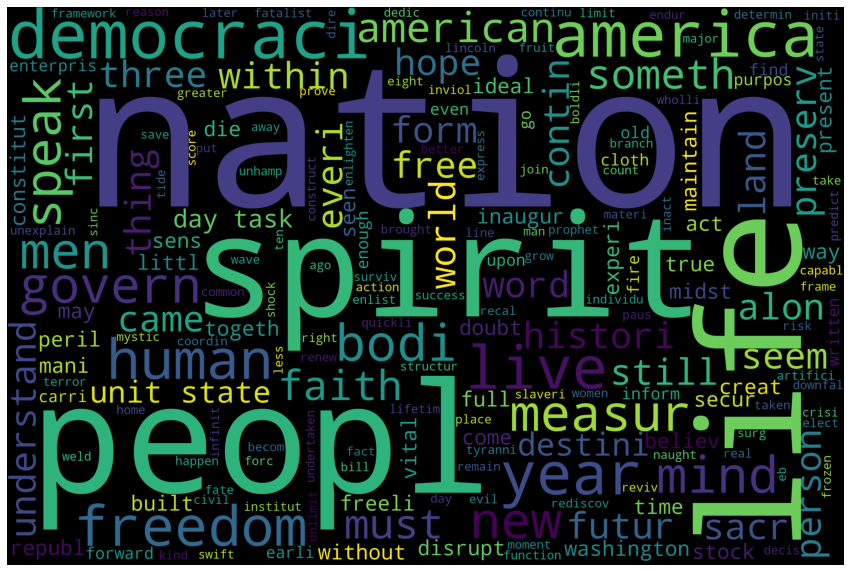

In [891]:
# Roosevelt Word Cloud
from wordcloud import WordCloud
words_Roosevelt = ' '.join(Roosevelt_st)

wordcloud_Roosevelt = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(words_Roosevelt)
plt.figure(1,figsize=(15,12))
plt.imshow(wordcloud_Roosevelt)
plt.axis('off')
plt.show()

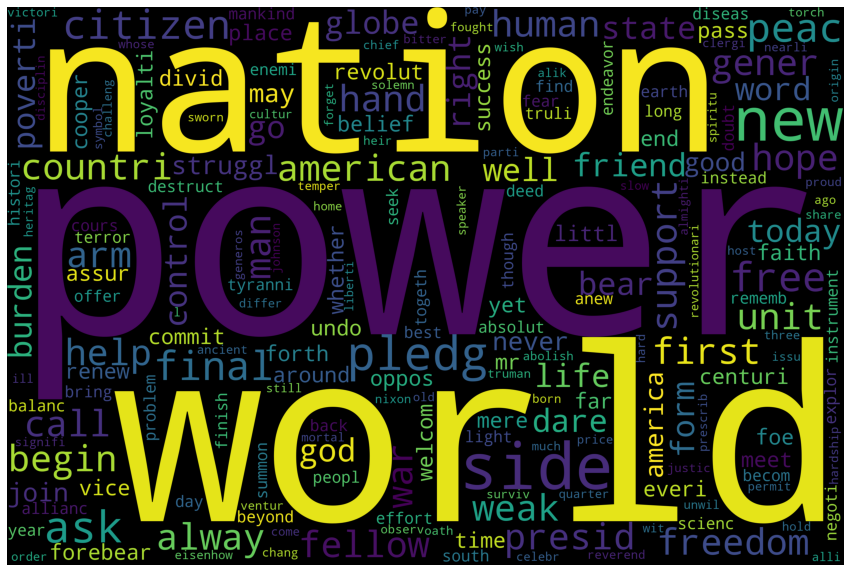

In [892]:
# Kennedy Word Cloud
words_Kennedy = ' '.join(Kennedy_st)

wordcloud_Kennedy = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(words_Kennedy)
plt.figure(1,figsize=(15,12))
plt.imshow(wordcloud_Kennedy)
plt.axis('off')
plt.show()

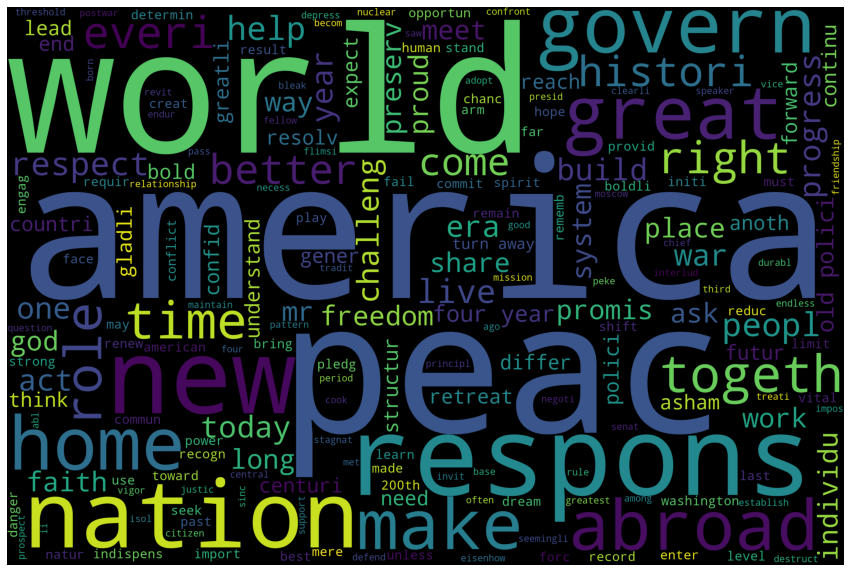

In [893]:
# Nixon Word Cloud
words_Nixon = ' '.join(Nixon_st)

wordcloud_Nixon = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(words_Nixon)
plt.figure(1,figsize=(15,12))
plt.imshow(wordcloud_Nixon)
plt.axis('off')
plt.show()

In [ ]:
# End of the Report